<h1 style="text-align: center;">Data Understanding</h1>
<h2 style="text-align: center;">Bank Marketing</h2>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 16/07/2024

---

# Introdução

O objetivo desta fase do projeto é fornecer uma compreensão detalhada dos dados fornecidos. A importância do entendimento dos dados reside em sua capacidade de guiar as próximas etapas do projeto, garantindo que as decisões sejam fundamentadas em informações precisas e completas. Compreender a estrutura, a qualidade e os padrões dos dados ajuda a identificar possíveis desafios e oportunidades de melhoria antes de avançar para a modelagem. Esta fase está diretamente ligada ao Entendimento do Negócio, pois traduz os requisitos de negócio em um contexto de dados, assegurando que a análise esteja alinhada com os objetivos da organização. O entendimento dos dados permite identificar características importantes, detectar anomalias e garantir que as análises e modelos preditivos sejam construídos com base em informações confiáveis.

Nesta fase do projeto, realizaremos uma análise exploratória detalhada dos dados do dataset "Bank Marketing" para entender melhor a estrutura dos dados, identificar padrões, verificar a distribuição das variáveis e descobrir possíveis correlações que possam influenciar os resultados.

# Coleta Inicial de Dados

A coleta inicial dos dados envolve documentar as fontes e métodos utilizados para obter os dados fornecidos. Os dados utilizados neste projeto são provenientes de campanhas de marketing direto realizadas por uma instituição bancária portuguesa. Essas campanhas foram baseadas em chamadas telefônicas para os clientes, com o objetivo de avaliar se os clientes subscreveriam um depósito a prazo. O dataset possui um total de 45.211 registros e 16 características, abrangendo variáveis categóricas, numéricas e binárias. O formato dos dados é tabular, com cada linha representando um cliente e cada coluna representando uma característica ou a variável alvo.

## Biblioteca utilizadas

1) pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [2]:
# Instalação das bibliotecas

# %pip install pandas

%pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importação das bibliotecas

import pandas as pd

import numpy as np

from scipy.stats import boxcox

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from ucimlrepo import fetch_ucirepo 

from IPython.display import display, Markdown

In [4]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")


In [5]:
# Configurando o modo de exibição do pandas
pd.options.display.float_format = "{:.4f}".format

## Coletando os dados

In [6]:
# Baixando os dados
bank_marketing = fetch_ucirepo(id=222)

In [7]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [8]:
# Criando variável que vai ter as variáveis transformada
Xt = X

# Descrição dos Dados

A descrição detalhada dos dados é essencial para entender a natureza das variáveis e a distribuição dos valores. O dataset contém variáveis de diferentes tipos:

Numéricas: incluem variáveis como 'age' (idade do cliente), 'balance' (saldo médio anual), 'duration' (duração da última chamada em segundos), 'campaign' (número de contatos realizados durante esta campanha), 'pdays' (número de dias desde o último contato em uma campanha anterior) e 'previous' (número de contatos realizados antes desta campanha).

Categóricas: incluem 'job' (tipo de emprego), 'marital' (estado civil), 'education' (nível educacional), 'contact' (tipo de comunicação), 'day_of_week' (dia da semana do último contato), 'month' (mês do último contato) e 'poutcome' (resultado da campanha anterior).

Binárias: incluem 'default' (tem crédito em default?), 'housing' (tem empréstimo habitacional?), 'loan' (tem empréstimo pessoal?) e a variável alvo 'y' (o cliente subscreveu um depósito a prazo?).

As variáveis que serão exploradas incluem:

| Nome da variável | Papel          | Tipo       | Demográfico           | Descrição                                                                                                                                                                                                                                                                                                                                                                                                                                         | Unidades | Valores ausentes |
|------------------|----------------|------------|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|------------------|
| idade            | Característica | Inteiro    | Idade                 |                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| trabalho         | Característica | Categórico | Ocupação              | Tipo de emprego (categórico: 'Admin.', 'Blue-collar', 'Entrepreneur', 'Householdant', 'Management', 'Aposentado', 'Autônomo', 'Serviços', 'Estudante', 'Técnico', 'Desempregado', 'Desconhecido')                                                                                                                                                                                                                                                 |          | Não              |
| conjugal         | Característica | Categórico | Estado civil          | estado civil (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' significa divorciado ou viúvo)                                                                                                                                                                                                                                                                                                                   |          | Não              |
| educação         | Característica | Categórico | Nível de escolaridade | (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')                                                                                                                                                                                                                                                                                                              |          | Não              |
| inadimplência    | Característica | Binário    |                       | tem crédito inadimplente?                                                                                                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| equilíbrio       | Característica | Inteiro    |                       | saldo médio anual                                                                                                                                                                                                                                                                                                                                                                                                                                 | Euros    | Não              |
| habitação        | Característica | Binário    |                       | Tem crédito habitação?                                                                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| empréstimo       | Característica | Binário    |                       | Tem empréstimo pessoal?                                                                                                                                                                                                                                                                                                                                                                                                                           |          | Não              |
| contato          | Característica | Categórico |                       | tipo de comunicação de contato (categórico: 'celular', 'telefone')                                                                                                                                                                                                                                                                                                                                                                                |          | Sim              |
| day_of_week      | Característica | Data       |                       | último dia de contato da semana                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| mês              | Característica | Data       |                       | último mês do ano de contato (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                                                 |          | Não              |
| duração          | Característica | Inteiro    |                       | Duração do último contato, em segundos (numérico). Observação importante: esse atributo afeta fortemente o destino de saída (por exemplo, se duration=0 e y='no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o fim da chamada y é obviamente conhecido. Assim, esse insumo só deve ser incluído para fins de benchmark e deve ser descartado se a intenção for ter um modelo preditivo realista. |          | Não              |
| campanha         | Característica | Inteiro    |                       | número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| pdays            | Característica | Inteiro    |                       | número de dias que se passaram após o cliente ter sido contatado pela última vez a partir de uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente)                                                                                                                                                                                                                                                         |          | Sim              |
| anterior         | Característica | Inteiro    |                       | número de contatos realizados antes desta campanha e para este cliente                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| presultado       | Característica | Categórico |                       | resultado da campanha de marketing anterior (categórico: 'fracasso', 'inexistente', 'sucesso')                                                                                                                                                                                                                                                                                                                                                    |          | Sim              |
| y                | Alvo           | Binário    |                       | O cliente subscreveu um depósito a prazo?                                                                                                                                                                                                                                                                                                                                                                                                         |          |                  |


# Exploração dos Dados

A exploração dos dados visa identificar padrões, tendências e anomalias que podem impactar a análise. Outliers são identificados e avaliados quanto à sua significância, enquanto correlações entre variáveis são analisadas para identificar relações importantes. A análise de variáveis categóricas inclui a avaliação das frequências e modos, e visualizações adicionais, como heatmaps e pair plots, são utilizadas para suportar a análise e identificar padrões mais complexos.

In [9]:
# Verificando as 5 primeiras linhas de x
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  


In [10]:
# Verificando as 5 primeiras linhas de x
print(y.head())

    y
0  no
1  no
2  no
3  no
4  no


## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

### Idade

In [11]:
# Resumo estatístico
X["age"].describe()

count   45211.0000
mean       40.9362
std        10.6188
min        18.0000
25%        33.0000
50%        39.0000
75%        48.0000
max        95.0000
Name: age, dtype: float64

In [12]:
# Visualizando a moda
X["age"].mode()

0    32
Name: age, dtype: int64

Ao analisarmos em detalhes os dados relativos à idade dos clientes, percebemos que a média das idades é próxima de 41, variando entre o mínimo de 18 e um máximo de 95. Além disso, podemos observar um desvio padrão de aproximadamente 11, o que indica uma dispersão significativa dos valores. Portanto, em média, os clientes têm idades compreendidas entre 30 e 51 anos.

É importante notar que a média de 41 anos supera tanto a mediana de 39 quanto a moda de 32, sugerindo uma assimetria positiva nos dados devido à presença de idades mais altas no terceiro quartil, que é de 48 anos, próximo do valor máximo.

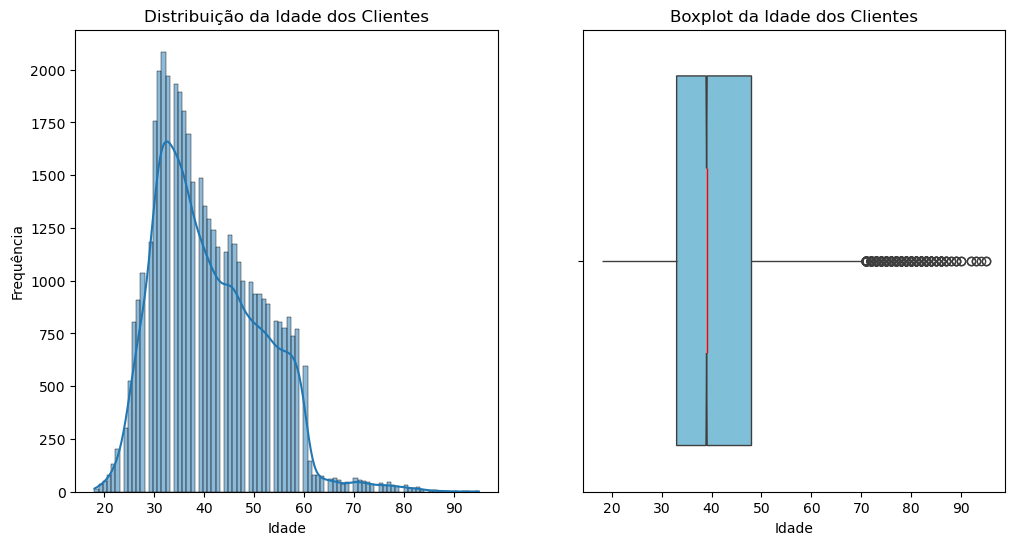

In [13]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(X["age"], kde=True)
plt.title("Distribuição da Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["age"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Idade dos Clientes")
plt.xlabel("Idade")
plt.show()

Como mencionado anteriormente, é possível observar a assimetria positiva nas idades devido à presença de uma pequena parte dos clientes que são pessoas idosas. Após analisar todas as variáveis, vamos propor algumas transformações para tentar melhorar a qualidade dos dados, reduzindo assimetrias e outliers.

### Trabalho

A variável que indica o trabalho exercido por cada cliente é do tipo categórica, podendo ser:

    Admin.: Administrativo
    Blue-collar: Trabalhador manual
    Entrepreneur: Empresário
    Householdant: Trabalhador doméstico
    Management: Gerência
    Retired: Aposentado
    Self-employed: Autônomo
    Services: Serviços gerais
    student: Estudante
    Technician: Técnico
    Unemployed: Desempregado
    Unknown: Desconhecido

Para verificar essa variável, vamos estar analisando a quantidade da frequência de cada classe.

In [14]:
# Criando uma tabela de frequência
job_counts = X['job'].value_counts().sort_index()
print(job_counts*100/44923)

job
admin.          11.5108
blue-collar     21.6637
entrepreneur     3.3101
housemaid        2.7603
management      21.0538
retired          5.0397
self-employed    3.5149
services         9.2469
student          2.0880
technician      16.9112
unemployed       2.9005
Name: count, dtype: float64


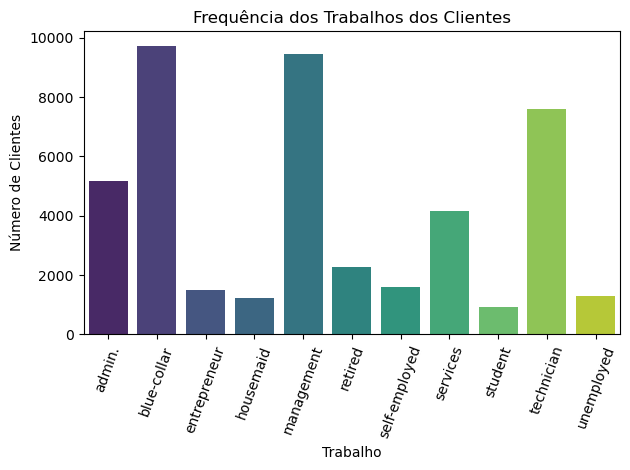

In [15]:
# Criando um gráfico de frequência
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Frequência dos Trabalhos dos Clientes')
plt.xlabel('Trabalho')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=70) 
plt.tight_layout()
plt.show()

Podemos observar tanto na lista acima quanto no gráfico que a base de dados possui mais clientes que desempenham papéis de administradores, trabalhadores manuais, gerência e técnicos, representando 11,51%, 21,6%, 21,05% e 16,91% das 44.923 observações da variável trabalho. É importante lembrar que esta variável possui 1.303 observações classificadas como trabalho desconhecido, além de 288 observações faltantes.

Devido aos problemas como desequilíbrio entre as classes e dados faltantes, na sessão de transformações serão abordados alguns mecanismos para o tratamento dessa variável.

Além disso, podemos verificar quais tipos de trabalhadores são mais propensos a aceitar o produto oferecido pelo banco por meio do telemarketing.

In [16]:
# Criando uma tabela de frequencia para clientes que aceitaram o produto
job_yes_counts = X[y.values == 'yes']['job'].value_counts().sort_index()
job_yes_percentages = job_yes_counts * 100 / job_yes_counts.sum()
print(job_yes_percentages)

job
admin.          12.0076
blue-collar     13.4729
entrepreneur     2.3406
housemaid        2.0742
management      24.7574
retired          9.8192
self-employed    3.5585
services         7.0219
student          5.1189
technician      15.9848
unemployed       3.8440
Name: count, dtype: float64


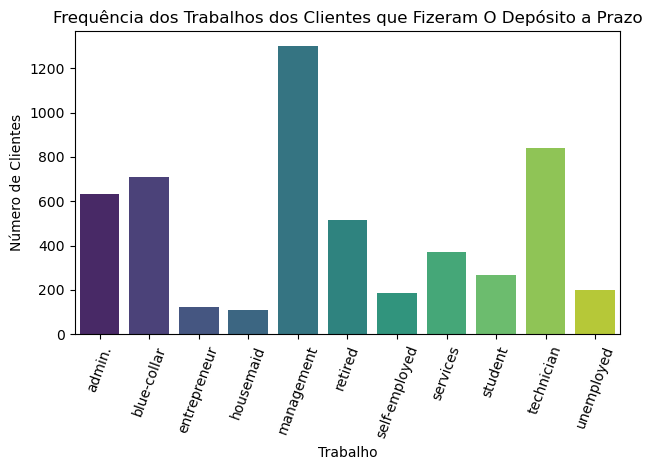

In [17]:
# Criando um gráfico de frequência para clientes que aceitaram o produto
sns.barplot(x=job_yes_counts.index, y=job_yes_counts.values, palette='viridis')
plt.title('Frequência dos Trabalhos dos Clientes que Fizeram O Depósito a Prazo')
plt.xlabel('Trabalho')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=70) 
plt.tight_layout()

Observando os trabalhadores que aceitaram o depósito a prazo, as coisas mudam um pouco. A maioria dos clientes que aceitam tem papéis como gerentes, técnicos, trabalhadores manuais, administradores e aposentados, representando aproximadamente 24,76%, 15,98%, 13,47% e 12,01% das 5.255 observações, respectivamente.

Essa análise é de extrema importância porque, anteriormente, vimos que o banco tem feito telemarketing para muitas pessoas que realizam trabalhos manuais, enquanto gerentes e técnicos representam cerca de 40,73% dos clientes que aceitam o produto.

### Estado Civil

A variável *marital* que representa o estado civil do cliente pode apresentar 4 categorias, sendo elas:

    Married: Casado
    Single: Solteiro
    Divorced: Divorciado ou Viúvo
    Unknown: Desconhecido
    

In [18]:
# Criando uma tabela de frequência
marital_counts = X['marital'].value_counts().sort_index()
marital_percentages = (marital_counts * 100 / sum(marital_counts.values))
print(marital_percentages)

marital
divorced   11.5171
married    60.1933
single     28.2896
Name: count, dtype: float64


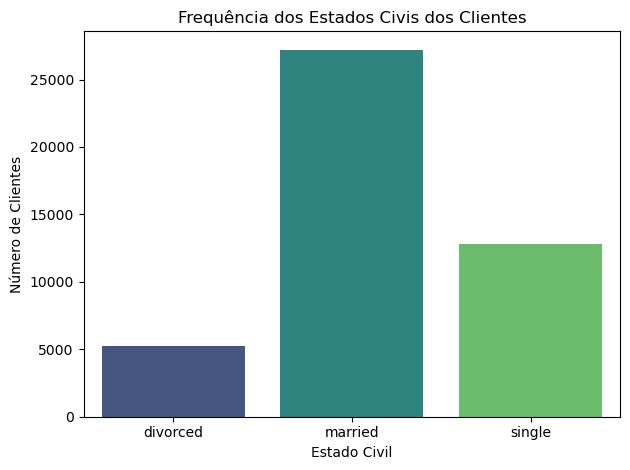

In [19]:
# Criando um gráfico de frêquencia
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')
plt.title('Frequência dos Estados Civis dos Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Como podemos ver tanto na lista de porcentagens quanto no gráfico de barras, os clientes casados, solteiros e divorciados representam aproximadamente 60,19%, 29,29% e 11,51% das 45.211 observações, respectivamente. Além disso, não há nenhum cliente com estado civil desconhecido.

Para entender mais sobre os clientes que aceitam o produto do banco devido ao telemarketing, podemos ver abaixo a análise feita com a variável de estado civil restrita aos clientes que realizaram o depósito a prazo.

In [20]:
# Criando uma tabela de frequencia para clientes que aceitaram o produto
marital_yes_counts = X[y.values == 'yes']['marital'].value_counts().sort_index()
marital_yes_percentages = marital_yes_counts * 100 / marital_yes_counts.sum()
print(marital_yes_percentages)

marital
divorced   11.7603
married    52.0892
single     36.1505
Name: count, dtype: float64


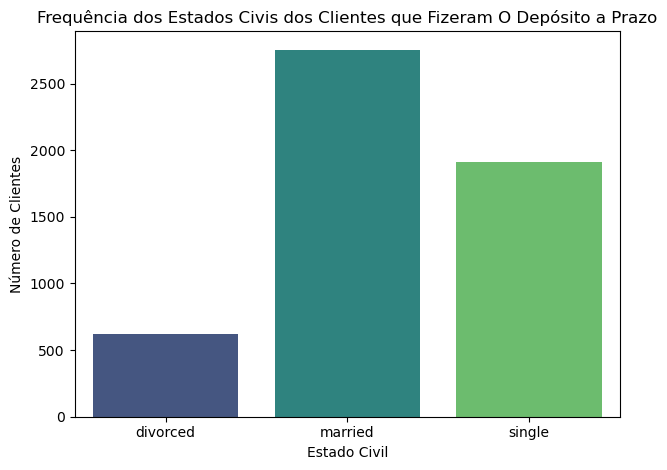

In [21]:
# Criando um gráfico de frequencia para clientes que aceitaram o produto
sns.barplot(x=marital_yes_counts.index, y=marital_yes_counts.values, palette='viridis')
plt.title('Frequência dos Estados Civis dos Clientes que Fizeram O Depósito a Prazo')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Podemos observar que os clientes que geralmente aceitam fazer o depósito a prazo não diferem significativamente do total de clientes do banco. Os clientes casados continuam sendo a maioria, seguidos por solteiros e divorciados, representando aproximadamente 52,09%, 36,15% e 11,76% dos 5.289 clientes que aceitaram o produto decorrente do marketing direto, respectivamente.

### Trabalho e Estado Civil

Uma análise interessante a ser realizada é verificar a proporção de cada tipo de trabalho em relação ao estado civil. Isso pode fornecer insights valiosos sobre o perfil dos clientes antes de criar um modelo categórico. Com essas informações, a instituição financeira pode ajustar suas estratégias de telemarketing de maneira mais eficaz, mesmo antes da conclusão do modelo de aprendizado de máquina. Dessa forma, cada etapa do projeto se torna mais útil e contribui para a implementação de melhorias contínuas nas estratégias de marketing.

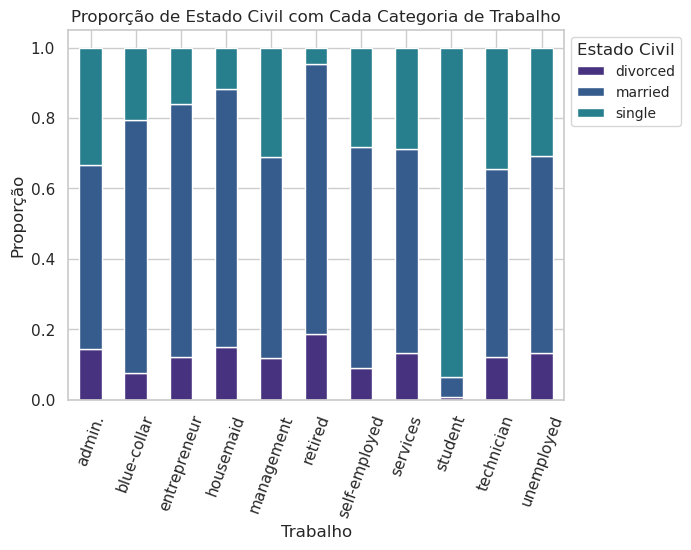

In [22]:
#Criando uma tabela cruzada
job_marital_counts = pd.crosstab(X['job'], X['marital'])
job_marital_counts_normalized = job_marital_counts.div(job_marital_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção
sns.set_theme(style="whitegrid", palette='viridis')
job_marital_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Estado Civil com Cada Categoria de Trabalho')
plt.legend(title='Estado Civil', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Como podemos observar no gráfico acima, que mostra a proporção de estado civil para cada categoria de trabalho, há algumas tendências interessantes. Os estudantes, por exemplo, apresentam mais de 90% de solteiros. Como era de se esperar, as pessoas aposentadas (retired) têm quase 20% de separados ou viúvos, e um pouco mais de 70% são casados.

Analisando os empregos com maior aceitação do produto oferecido pelo telemarketing, podemos dizer que os gerentes e administradores têm um equilíbrio maior entre casados e solteiros. Já as pessoas que fazem trabalhos manuais (blue-collar) apresentam uma maior quantidade de casados e são a segunda ocupação com menos pessoas divorciadas.

Essas informações são valiosas para entender o perfil dos clientes e ajustar as estratégias de marketing de forma mais direcionada e eficaz. Com essas análises, a instituição financeira pode personalizar suas campanhas de telemarketing, aumentando a probabilidade de sucesso ao adaptar as abordagens às características específicas de cada grupo de clientes.

Para obter uma melhor probabilidade de sucesso, podemos verificar a mesma proporção, mas para os clientes que aceitaram fazer o depósito a prazo, conforme mostrado no gráfico abaixo.

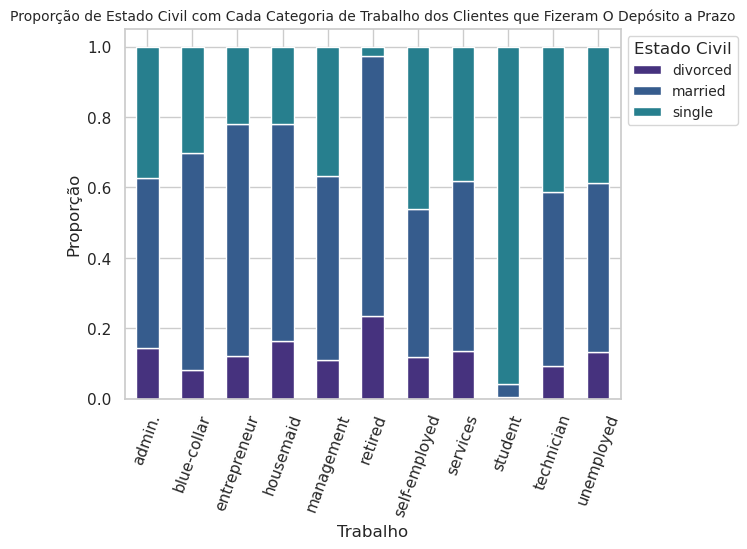

In [23]:
#Criando uma tabela cruzada dos clientes que aceitaram o produto
job_marital_y_counts = pd.crosstab(X[y.values == 'yes']['job'], X[y.values == 'yes']['marital'])
job_marital_y_counts_normalized = job_marital_y_counts.div(job_marital_y_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção dos clientes que aceitaram o produto
sns.set_theme(style="whitegrid", palette='viridis')
job_marital_y_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Estado Civil com Cada Categoria de Trabalho dos Clientes que Fizeram O Depósito a Prazo', fontsize=10)
plt.legend(title='Estado Civil', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Como podemos ver no gráfico acima, não há uma mudança significativa na proporção do estado civil entre os clientes que fizeram o depósito a prazo. Sendo assim, o banco poderia focar mais nos clientes que trabalham como administradores, trabalhadores manuais, gerentes e técnicos, e que são casados ou solteiros. Como vimos anteriormente, esses são os tipos de clientes que têm maior sucesso com as campanhas de telemarketing, ao considerar apenas essas duas variáveis.

Essa abordagem permitirá que a instituição financeira direcione seus esforços de marketing de maneira mais eficiente, aumentando a probabilidade de conversão e, consequentemente, a eficácia das suas campanhas de telemarketing.

### Educação

A variável *education* que representa o nível de educação do cliente pode apresentar 4 categorias, sendo elas:

    Primary: illiterate, basic.4y, basic.6y e basic.9y
    Secondary: high.school
    tertiary: professional.course, university.degree
    Unknown: Desconhecido

In [24]:
# Criando uma tabela de frequência
education_counts = X['education'].value_counts().sort_index()
education_percentages = (education_counts * 100 / sum(education_counts.values))
print(education_percentages)

education
primary     15.8025
secondary   53.5176
tertiary    30.6800
Name: count, dtype: float64


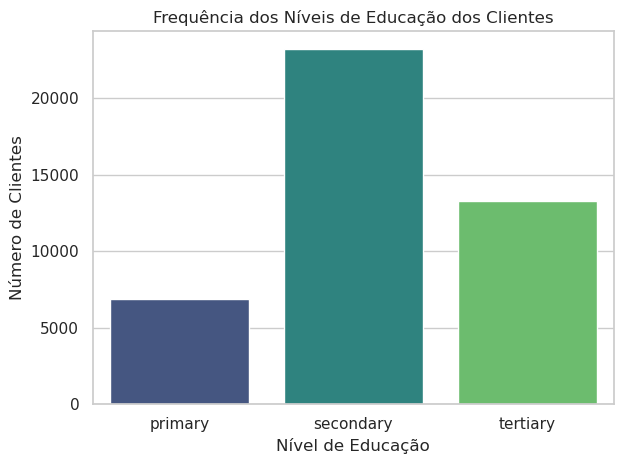

In [25]:
# Criando um gráfico de frêquencia
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Frequência dos Níveis de Educação dos Clientes')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Como podemos observar na tabela de percentuais e no gráfico de frequência, aproximadamente 53,52% dos clientes possuem um nível de educação secundário (secondary). De acordo com os dados da tabela de variáveis, definimos que o nível de educação secundário corresponde a pessoas que completaram o ensino médio (*high school*). A segunda categoria mais prevalente na base de dados são os clientes com um nível de educação terciário (*tertiary*), que consideramos como pessoas que possuem um diploma universitário ou que tem um curso profissional, representando 30,68% dos clientes.

Como já mencionado, a proposta desta etapa do projeto é entender melhor quais tipos de clientes apresentam conversão por meio do marketing direto. No entanto, também podemos analisar a frequência dos níveis de educação entre os clientes que aceitaram fazer o depósito a prazo.

In [26]:
# Criando uma tabela de frequência dos clientes que aceitaram o produto
education_y_counts = X[y.values == 'yes']['education'].value_counts().sort_index()
education_y_percentages = (education_y_counts * 100 / sum(education_y_counts.values))
print(education_y_percentages)

education
primary     11.7332
secondary   48.6401
tertiary    39.6268
Name: count, dtype: float64


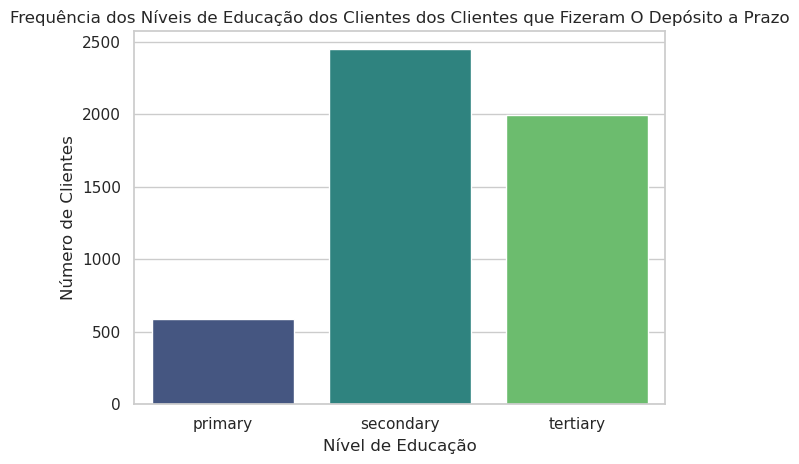

In [27]:
# Criando um gráfico de frêquencia dos clientes que aceitaram o produto
sns.barplot(x=education_y_counts.index, y=education_y_counts.values, palette='viridis')
plt.title('Frequência dos Níveis de Educação dos Clientes dos Clientes que Fizeram O Depósito a Prazo')
plt.xlabel('Nível de Educação')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Ao analisarmos o nível de educação dos clientes que aceitaram fazer o depósito a prazo, observamos uma mudança significativa. A distribuição entre clientes com nível de educação terciário e secundário se torna mais equilibrada, representando aproximadamente 39,63% e 48,64%, respectivamente. Esse equilíbrio pode estar relacionado ao perfil dos clientes mais propensos à conversão por meio do telemarketing, que inclui administradores, técnicos, gerentes, trabalhadores manuais e aposentados. Normalmente, trabalhadores manuais, que podem ser menos favorecidos economicamente, têm um nível de educação mais baixo, enquanto os profissionais das outras categorias mencionadas geralmente possuem níveis de educação superior.

### Trabalho e Nível de Educação

Para verificar se as afirmações mencionadas são de fato reais, podemos utilizar o mesmo gráfico de proporção empregado na seção anterior. Esse gráfico mostrará a distribuição de cada nível de educação em relação às diferentes categorias de trabalho.

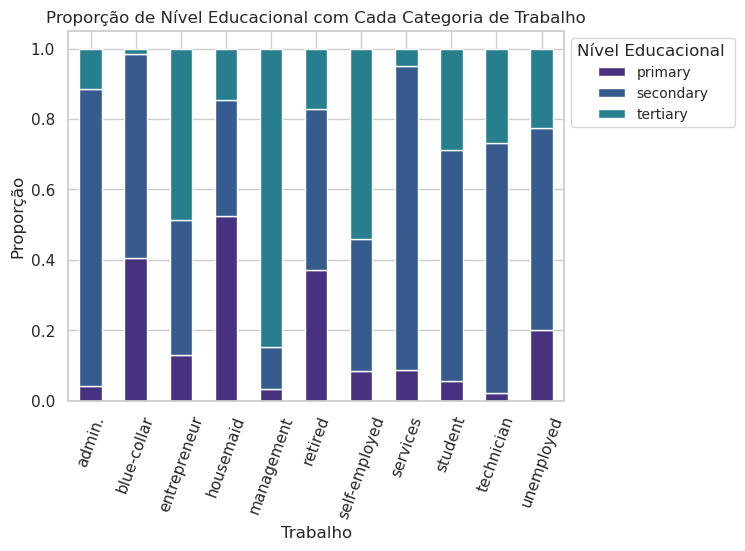

In [28]:
#Criando uma tabela cruzada
job_education_counts = pd.crosstab(X['job'], X['education'])
job_education_counts_normalized = job_education_counts.div(job_education_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção
sns.set_theme(style="whitegrid", palette='viridis')
job_education_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Nível Educacional com Cada Categoria de Trabalho')
plt.legend(title='Nível Educacional ', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Como era de se esperar, os trabalhadores manuais e os trabalhadores domésticos são as categorias com maior proporção de pessoas com nível de educação primária, representando aproximadamente 40% e 50%, respectivamente. Por outro lado, gerentes, empresário e trabalhadores autônomos são os clientes com a maior proporção de nível de educação terciário. É interessante notar que os aposentados apresentam uma distribuição mais equilibrada entre as três classificações de nível educacional. As demais categorias de trabalho tendem a ter uma maior proporção de clientes com nível de educação secundário.

Além disso também podemos visualizar abaixo a mesma proporção mas levando em conta os clientes que aceitaram o produto.

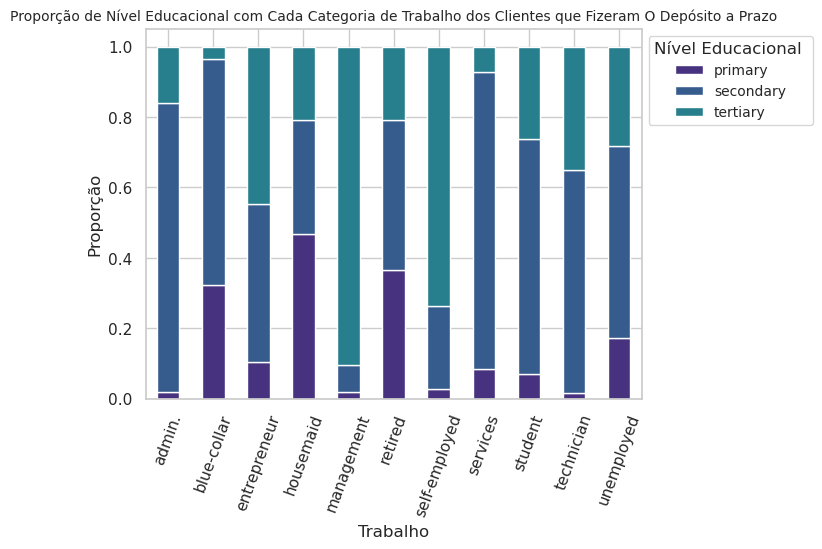

In [29]:
#Criando uma tabela cruzada dos clientes que aceitaram o produto
job_education_y_counts = pd.crosstab(X[y.values == 'yes']['job'], X[y.values == 'yes']['education'])
job_education_y_counts_normalized = job_education_y_counts.div(job_education_y_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção dos clientes que aceitaram o produto
sns.set_theme(style="whitegrid", palette='viridis')
job_education_y_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Nível Educacional com Cada Categoria de Trabalho dos Clientes que Fizeram O Depósito a Prazo', fontsize=10)
plt.legend(title='Nível Educacional ', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


A diferença mais significativa entre os clientes que aceitaram fazer o depósito a prazo foi observada na classe dos trabalhadores autônomos, que apresentou uma queda considerável na proporção de pessoas com nível de educação secundário. Outro ponto interessante é que, em todas as categorias de trabalho, houve uma redução ou estagnação na proporção de clientes com nível de educação primário. Esse fenômeno será analisado mais detalhadamente quando considerarmos os salários desses clientes, pois geralmente indivíduos com menor nível educacional tendem a ter salários mais baixos e, consequentemente, optam por gastar seu capital disponível em bens essenciais, ao invés de investir.

### Inadimplência

A variável *default* é binária, com valores *no* ou *yes*, indicando se o cliente possui algum crédito inadimplente.

In [30]:
# Criando uma tabela de frequência
inadimplencia_counts = X['default'].value_counts().sort_index()
inadimplencia_percentages = (inadimplencia_counts * 100) / sum(inadimplencia_counts)
print(inadimplencia_percentages)

default
no    98.1973
yes    1.8027
Name: count, dtype: float64


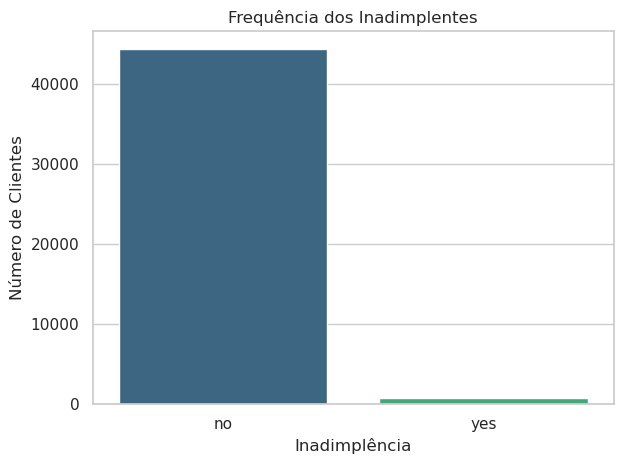

In [31]:
# Criando um gráfico de frêquencia
sns.barplot(x=inadimplencia_counts.index, y=inadimplencia_counts.values, palette='viridis')
plt.title('Frequência dos Inadimplentes')
plt.xlabel('Inadimplência')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Ao analisar a tabela e o gráfico de barras dos inadimplentes, podemos observar um desequilíbrio significativo entre as classes, com aproximadamente 98,2% dos clientes sem inadimplência. Devido a esse desbalanceamento, é recomendável usar técnicas de oversampling para equilibrar a classe minoritária (inadimplentes) com a classe majoritária (não inadimplentes). Isso ajudará a garantir que o algoritmo de aprendizado de máquina não se concentre apenas nos casos de não inadimplência, proporcionando um modelo mais equilibrado e eficaz.

Abaixo, podemos ver o percentual de inadimplentes que aceitaram o depósito a prazo.

In [32]:
# Criando uma tabela de frequência dos clientes que aceitaram o produto
inadimplencia_y_counts = X[y.values == 'yes']['default'].value_counts().sort_index()
inadimplencia_y_percentages = (inadimplencia_y_counts * 100) / sum(inadimplencia_y_counts)
print(inadimplencia_y_percentages)

default
no    99.0168
yes    0.9832
Name: count, dtype: float64


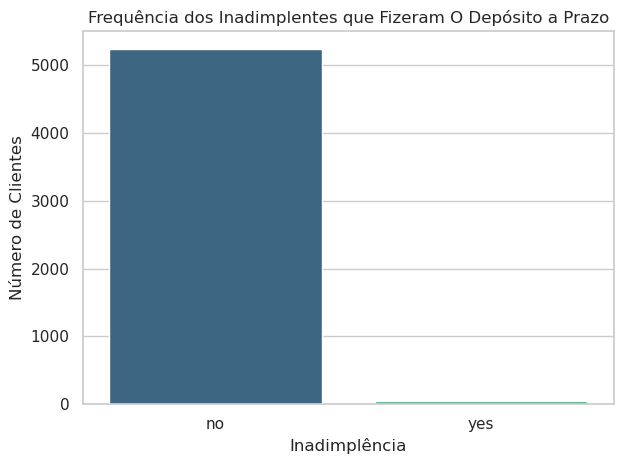

In [33]:
# Criando um gráfico de frêquencia
sns.barplot(x=inadimplencia_y_counts.index, y=inadimplencia_y_counts.values, palette='viridis')
plt.title('Frequência dos Inadimplentes que Fizeram O Depósito a Prazo')
plt.xlabel('Inadimplência')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Ao analisar os clientes que aceitaram fazer o depósito a prazo, observamos uma situação ainda mais desafiadora, com os casos de inadimplência caindo praticamente pela metade, representando apenas 0,98% das observações. Esse fenômeno pode estar relacionado a um padrão similar ao identificado na seção anterior, onde indivíduos com menor capital disponível e que precisam pagar suas contas estão menos inclinados a optar por um investimento oferecido pelo banco.

### Trabalho e Inadimplência

Para entender melhor os perfis dos clientes com os quais estamos lidando, é interessante analisar quais são as ocupações dos clientes e qual a proporção de inadimplentes em cada categoria de trabalho.

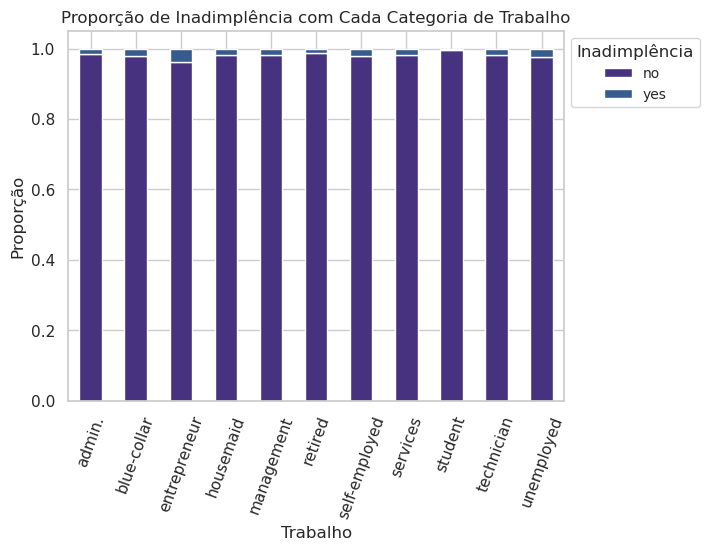

In [34]:
#Criando uma tabela cruzada
job_default_counts = pd.crosstab(X['job'], X['default'])
job_default_counts_normalized = job_default_counts.div(job_default_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção
sns.set_theme(style="whitegrid", palette='viridis')
job_default_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Inadimplência com Cada Categoria de Trabalho')
plt.legend(title='Inadimplência', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


No gráfico acima, podemos observar um fenômeno interessante e comum em economias: pessoas com maior inadimplência são frequentemente empresários, que se expõem a riscos em busca de retorno financeiro. No entanto, um dado preocupante é que pessoas desempregadas também apresentam um grau significativo de inadimplência, sendo a segunda categoria mais inadimplente. Isso pode ser explicado pelo fato de que, em um sistema onde tudo gira em torno do capital, indivíduos desempregados frequentemente precisam se endividar para sobreviver.

Em contrapartida, é encorajador ver que os estudantes não apresentam inadimplência. Isso é particularmente interessante em uma economia onde os estudantes conseguem estudar sem precisar se endividar. No entanto, surge um questionamento: será que as pessoas menos favorecidas estão conseguindo estudar? Ou será que elas só conseguiriam estudar se obtivessem crédito para financiar seus estudos? E pelo fato de serem mais propensas à inadimplência, acabam não conseguindo obter esse crédito?

Como já estamos fazendo em nossa metodologia de análise, a seguir verificaremos a mesma proporção, mas focando nos clientes que aceitaram fazer o depósito a prazo.

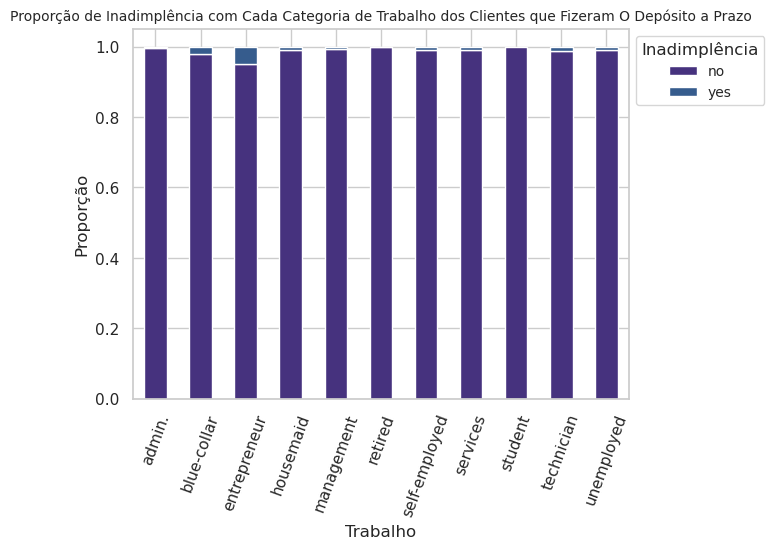

In [35]:
#Criando uma tabela cruzada dos clientes que aceitaram o produto
job_default_y_counts = pd.crosstab(X[y.values == 'yes']['job'], X[y.values == 'yes']['default'])
job_default_y_counts_normalized = job_default_y_counts.div(job_default_y_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção dos clientes que aceitaram o produto
sns.set_theme(style="whitegrid", palette='viridis')
job_default_y_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Inadimplência com Cada Categoria de Trabalho dos Clientes que Fizeram O Depósito a Prazo', fontsize=10)
plt.legend(title='Inadimplência', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


Já sabíamos que a maioria das categorias de trabalho teria uma redução no número de pessoas inadimplentes, com algumas classes apresentando até mesmo nenhum inadimplente entre os clientes que aceitaram fazer o depósito a prazo. No entanto, há um aspecto interessante observado entre os empresários, que experimentaram um aumento na inadimplência. Isso pode estar relacionado à crise financeira de 2008, que levou à redução das taxas de juros. Com taxas de juros mais baixas, os empresários podem ter visto uma oportunidade para pegar dinheiro emprestado e investir, tornando mais atraente manter o dinheiro aplicado do que pagar a dívida.



### Equilíbrio

A variável *balance* representa o saldo médio anual em euros, considerando que a base de dados é de um banco português. Portanto, essa variável é expressa em valores inteiros.

In [36]:
# Resumo estatístico
X["balance"].describe()

count    45211.0000
mean      1362.2721
std       3044.7658
min      -8019.0000
25%         72.0000
50%        448.0000
75%       1428.0000
max     102127.0000
Name: balance, dtype: float64

In [37]:
# Visualizando a moda
X["balance"].mode()

0    0
Name: balance, dtype: int64

Como pode ser observado na tabela acima, o saldo médio anual (média) é de aproximadamente 1362,27 euros, enquanto a mediana é de 448 euros, e a moda é 0. Portanto, a média não é uma representação precisa da distribuição dos saldos, sendo elevada por possíveis outliers. Isso é evidenciado pelo valor máximo de 102.127,00 euros e pelo valor mínimo de -8.019,00 euros.

A diferença significativa entre a média e a mediana indica uma distribuição assimétrica positiva, onde a média é praticamente três vezes maior que a mediana. A presença de outliers, particularmente no extremo superior, contribui para essa assimetria.

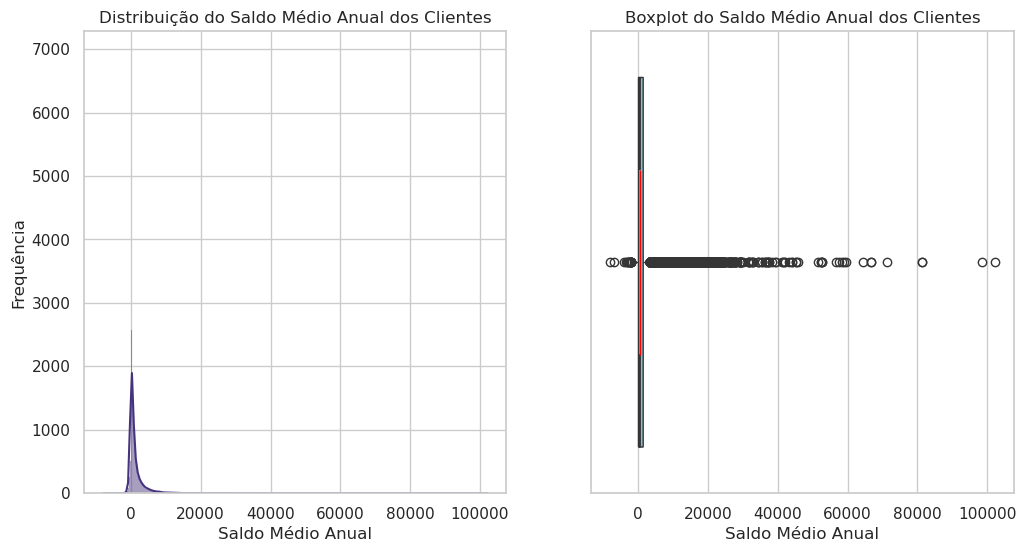

In [38]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(X["balance"], kde=True)
plt.title("Distribuição do Saldo Médio Anual dos Clientes")
plt.xlabel("Saldo Médio Anual")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["balance"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Saldo Médio Anual dos Clientes")
plt.xlabel("Saldo Médio Anual")
plt.show()

Como podemos ver nos gráficos acima, a distribuição dos saldos anuais dos clientes é bastante assimétrica, com muitos valores altos além do terceiro quartil contribuindo para essa assimetria. Portanto, será extremamente importante aplicar alguma transformação nessa variável para tentar corrigir tanto a sua assimetria quanto reduzir o impacto dos outliers.

### Trabalho e Equilíbrio

A analise feita abaixo representa a distribuição dos saldos anuais por profissão.

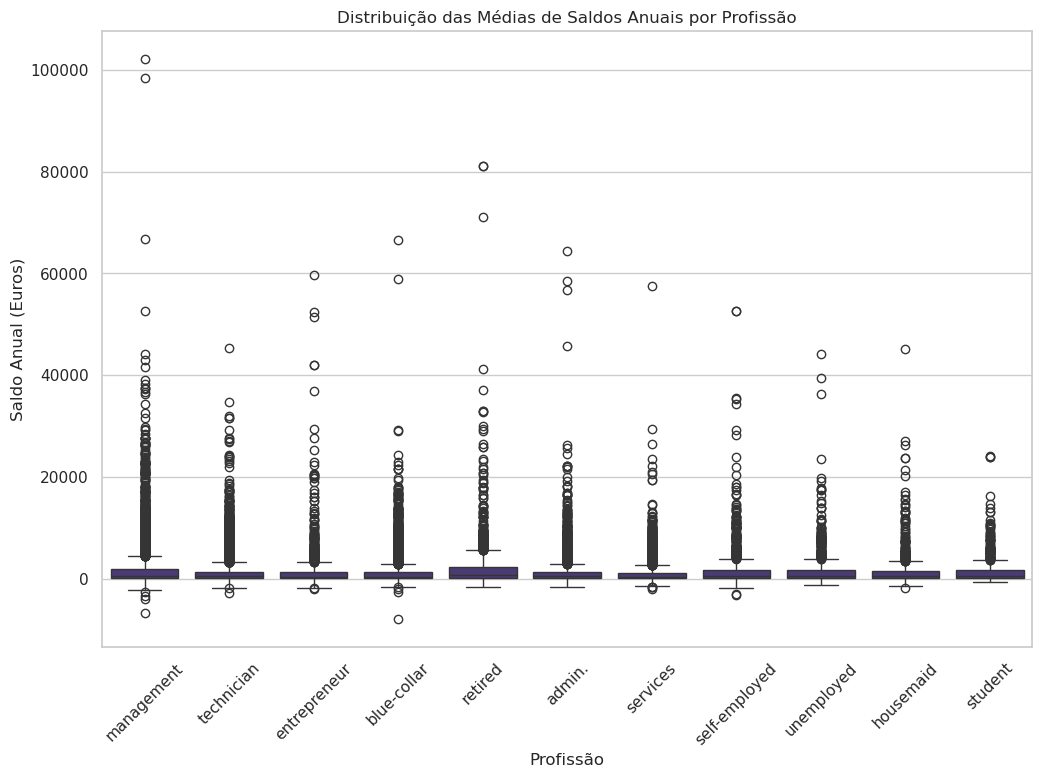

In [50]:
# Gráfico das médias de saldos anuais por profissação
plt.figure(figsize=(12, 8))
sns.boxplot(x='job', y='balance', data=X)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.title('Distribuição das Médias de Saldos Anuais por Profissão')
plt.xlabel('Profissão')
plt.ylabel('Saldo Anual (Euros)')
plt.show()

Como podemos ver no gráfico acima, que contém diversos boxplots separados por profissão, conseguimos entender um pouco do comportamento do saldo anual médio por cada classe de profissão. Observamos que os gerentes são a classe que mais apresenta outliers possitivos, indicando que pessoas nessa profissão frequentemente têm saldos anuais mais elevados e variáveis.

Outro ponto interessante é a classe de trabalhadores manuais, onde encontramos o valor mínimo de -8.019 euros, mas também duas observações próximas de 60.000 euros. A categoria de trabalho que apresenta menor variabilidade nos saldos médios anuais são os estudantes, com outliers apenas à direita (positivos) e uma concentração maior. Isso ocorre porque muitos estudantes ainda são sustentados pelos pais ou ganham dinheiro através de pequenos empreendimentos e bolsas de pesquisa.

Uma visualização também interessante é criar a mesma análise, mas focando nos clientes que fizeram o investimento no banco. Isso nos permitirá entender melhor o comportamento do saldo anual médio por profissão entre os clientes que decidiram aceitar o depósito a prazo.

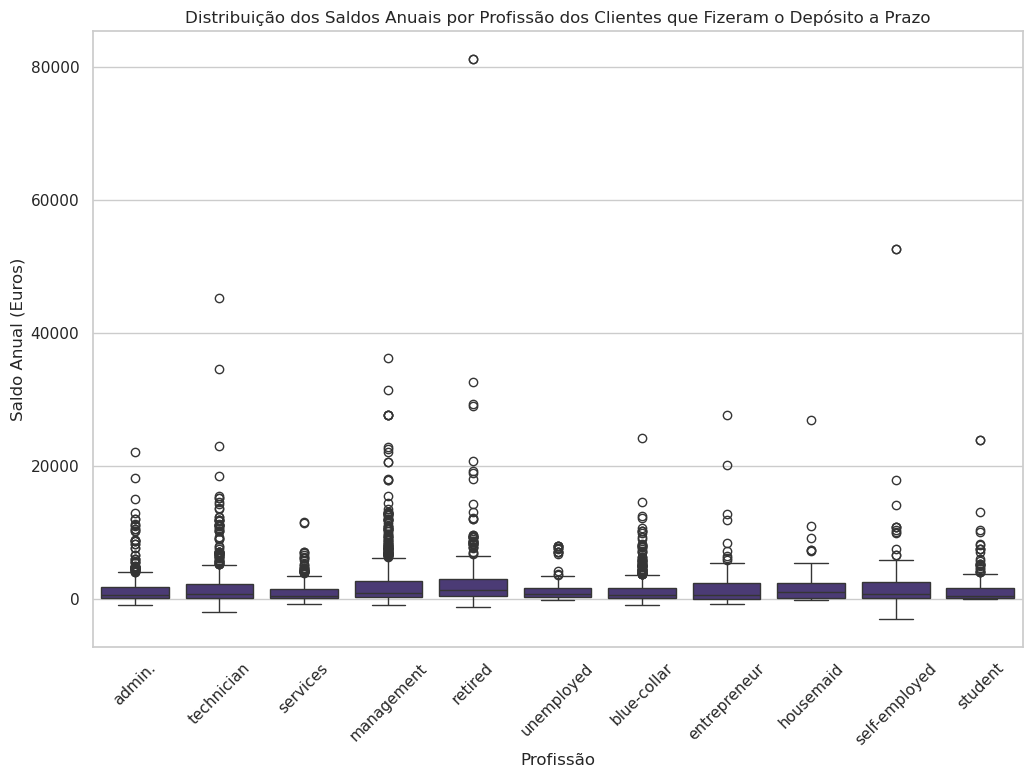

In [51]:
# Gráfico das médias de saldos anuais por profissação dos clientes que fizeram o depósito a prazo
plt.figure(figsize=(12, 8))
sns.boxplot(x='job', y='balance', data=X[y.values == "yes"])
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.title('Distribuição dos Saldos Anuais por Profissão dos Clientes que Fizeram o Depósito a Prazo')
plt.xlabel('Profissão')
plt.ylabel('Saldo Anual (Euros)')
plt.show()

Podemos observar uma melhora na distribuição dos dados quando analisamos os clientes que fizeram o depósito a prazo, apresentando uma redução dos outliers. Agora, percebemos que existem apenas três valores acima da média de saldo anual de 40 mil euros. Isso pode ocorrer porque essas pessoas, que têm uma boa renda, fazem melhores escolhas de investimento.

Além disso, como já mencionado indiretamente na análise de inadimplência, os clientes que fazem o depósito a prazo possuem uma renda maior. Por isso, o gráfico acima não apresenta nenhum outlier abaixo do primeiro bigode dos boxplots.

Interessantemente, a classe de trabalho de autônomos que aceita fazer o investimento possui o valor mais baixo de saldo médio. Isso pode ocorrer porque, muitas vezes, essas pessoas devem assumir um grau de risco por serem considerados empreendedores. Mesmo enfrentando prejuízos, elas ainda optam por fazer o investimento no banco.

Com base em toda essa análise feita por meio desse gráfico, podemos afirmar que a maioria dos clientes que aceitam fazer o depósito a prazo tem uma média anual de saldo entre 0 e 15.000 euros.

### Habitação

A variável *housing* é uma variável binária que assume os valores *yes* ou *no*. Ela indica se o cliente possui um crédito de habitação.

In [56]:
# Criando uma tabela de frequência
housing_counts = X['housing'].value_counts().sort_index()
housing_percentages= (housing_counts * 100) / sum(housing_counts)
print(housing_percentages)

housing
no    44.4162
yes   55.5838
Name: count, dtype: float64


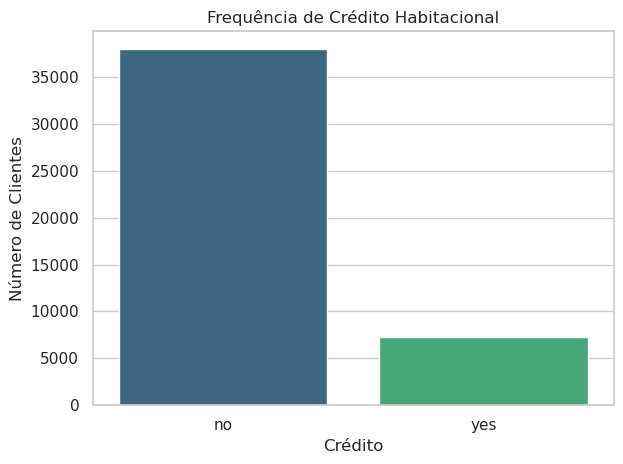

In [72]:
# Criando um gráfico de frêquencia
sns.barplot(x=housing_counts.index, y=housing_counts.values, palette='viridis')
plt.title('Frequência de Crédito Habitacional')
plt.xlabel('Crédito')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

A variável *housing* apresenta um bom equilíbrio entre suas duas classes: aproximadamente 55,58% dos clientes possuem crédito de habitação, enquanto o restante não possui.

In [65]:
# Criando uma tabela de frequência
housing_y_counts = X[y.values == 'yes']['housing'].value_counts().sort_index()
housing_y_percentages= (housing_y_counts * 100) / sum(housing_y_counts)
print(housing_y_percentages)

housing
no    63.4146
yes   36.5854
Name: count, dtype: float64


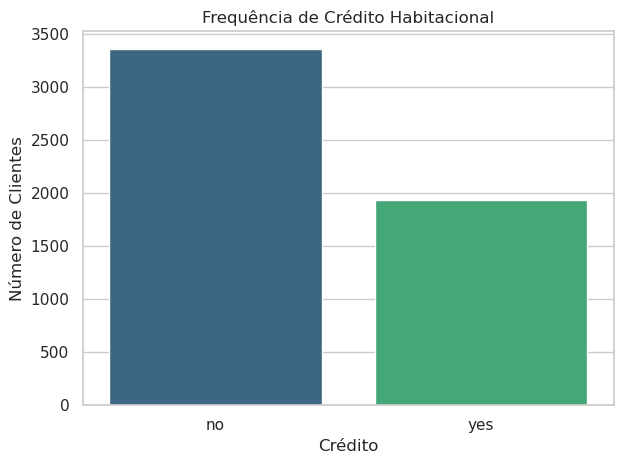

In [73]:
# Criando um gráfico de frêquencia dos clientes que aceitaram o produto
sns.barplot(x=housing_y_counts.index, y=housing_y_counts.values, palette='viridis')
plt.title('Frequência de Crédito Habitacional')
plt.xlabel('Crédito')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

Um fato interessante é que aproximadamente 63,41% dos clientes que aceitam fazer o investimento não possuem crédito habitacional. Isso pode ser explicado pelo fato de que clientes com crédito habitacional tendem a ter uma renda maior. Como vimos anteriormente, os clientes que aceitam fazer o depósito a prazo apresentam uma renda mediana, e notamos uma diminuição nos outliers positivos. Portanto, a falta de crédito habitacional entre esses clientes pode indicar que eles não têm renda tão alta quanto a dos clientes com crédito habitacional.

Para compreender melhor essa variável, é importante analisá-la em conjunto com outras variáveis.

### Habitação e Estado Civil

Abaixo, será realizada uma análise para verificar a distribuição de clientes com crédito de habitação por cada categoria de trabalho.

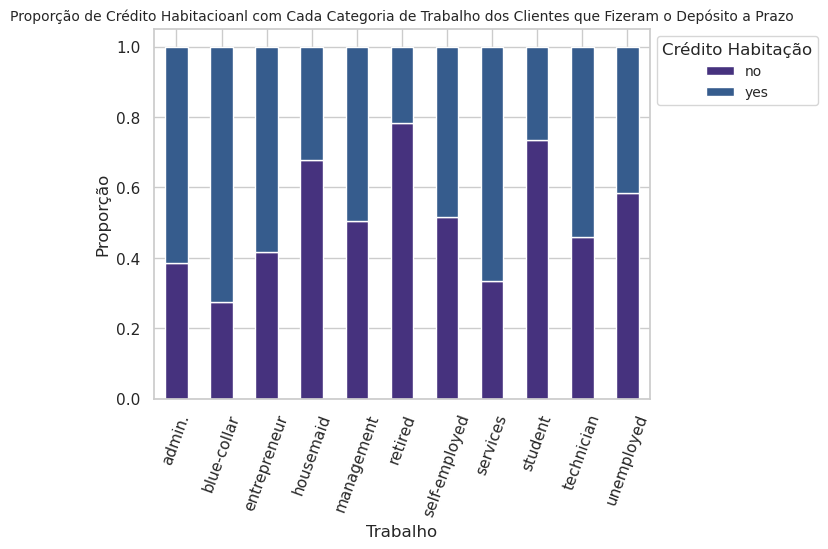

In [69]:
#Criando uma tabela cruzada
job_housing_counts = pd.crosstab(X['job'],X['housing'])
job_housing_counts_normalized = job_housing_counts.div(job_housing_counts.sum(axis=1), axis=0)

# Plotar gráfico de proporção 
sns.set_theme(style="whitegrid", palette='viridis')
job_housing_counts_normalized.plot(kind='bar', stacked=True)
plt.xlabel('Trabalho')
plt.ylabel('Proporção')
plt.title('Proporção de Crédito Habitacioanl com Cada Categoria de Trabalho dos Clientes que Fizeram o Depósito a Prazo', fontsize=10)
plt.legend(title='Crédito Habitação', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=70) 
plt.show()


No gráfico acima, podemos observar que as categorias de trabalhadores domésticos, aposentados e estudantes são aquelas com a maior proporção de pessoas sem crédito habitacional. Isso ocorre porque muitas dessas pessoas não possuem garantias suficientes para a concessão de crédito habitacional.

Além disso, a classe de aposentados é a que tem a menor proporção de clientes com crédito habitacional. Isso pode ser explicado pelo fato de que, devido à idade avançada, a expectativa de vida desses clientes é menor, o que reduz o interesse das instituições financeiras em conceder crédito para essa faixa etária.

### Empréstimo

A variável *loan* é uma variável categórica que assume os valores *yes* ou *no*, indicando se o cliente possui um empréstimo pessoal.

In [71]:
# Criando uma tabela de frequência
loan_counts = X['loan'].value_counts().sort_index()
loan_percentages= (loan_counts * 100) / sum(loan_counts)
print(loan_percentages)

loan
no    83.9774
yes   16.0226
Name: count, dtype: float64


In [ ]:
# Criando um gráfico de frêquencia
sns.barplot(x=loan_counts.index, y=loan_counts.values, palette='viridis')
plt.title('Frequência dos Crédito Habitacional')
plt.xlabel('Empréstimo')
plt.ylabel('Número de Clientes')
#plt.xticks(rotation=90) 
plt.tight_layout()

# Verificação da Qualidade dos Dados

A verificação da qualidade dos dados envolve a avaliação da completude, consistência e integridade dos dados. Identificamos possíveis problemas, como dados duplicados e inconsistentes, e discutimos propostas de correção e limpeza dos dados. A completude dos dados é analisada verificando a presença de valores ausentes, enquanto a consistência é avaliada através da coerência entre variáveis relacionadas.

## Completude dos Dados

### Valores Ausentes

A presença de valores ausentes em 'job', 'education', 'contact' e 'poutcome' precisa ser tratada, sendo necessário propostas de métodos de imputação, como substituição pela moda ou uso de técnicas de machine learning.

In [40]:
# verificando valores ausentes no dataset
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

Podemos observar na tabela acima o número de observações para cada característica e a quantidade de dados faltantes. O banco de dados possui um total de 45.211 observações. As variáveis job (trabalho), education (educação), contact (contato) e poutcome (resultado da campanha anterior) apresentam 288, 1.857, 13.020 e 36.959 dados faltantes, respectivamente.

## Consistência e Integridade

### Dados Duplicados

In [41]:
# Verificação de registros duplicados
X.duplicated().sum()

0

### Inconsistências

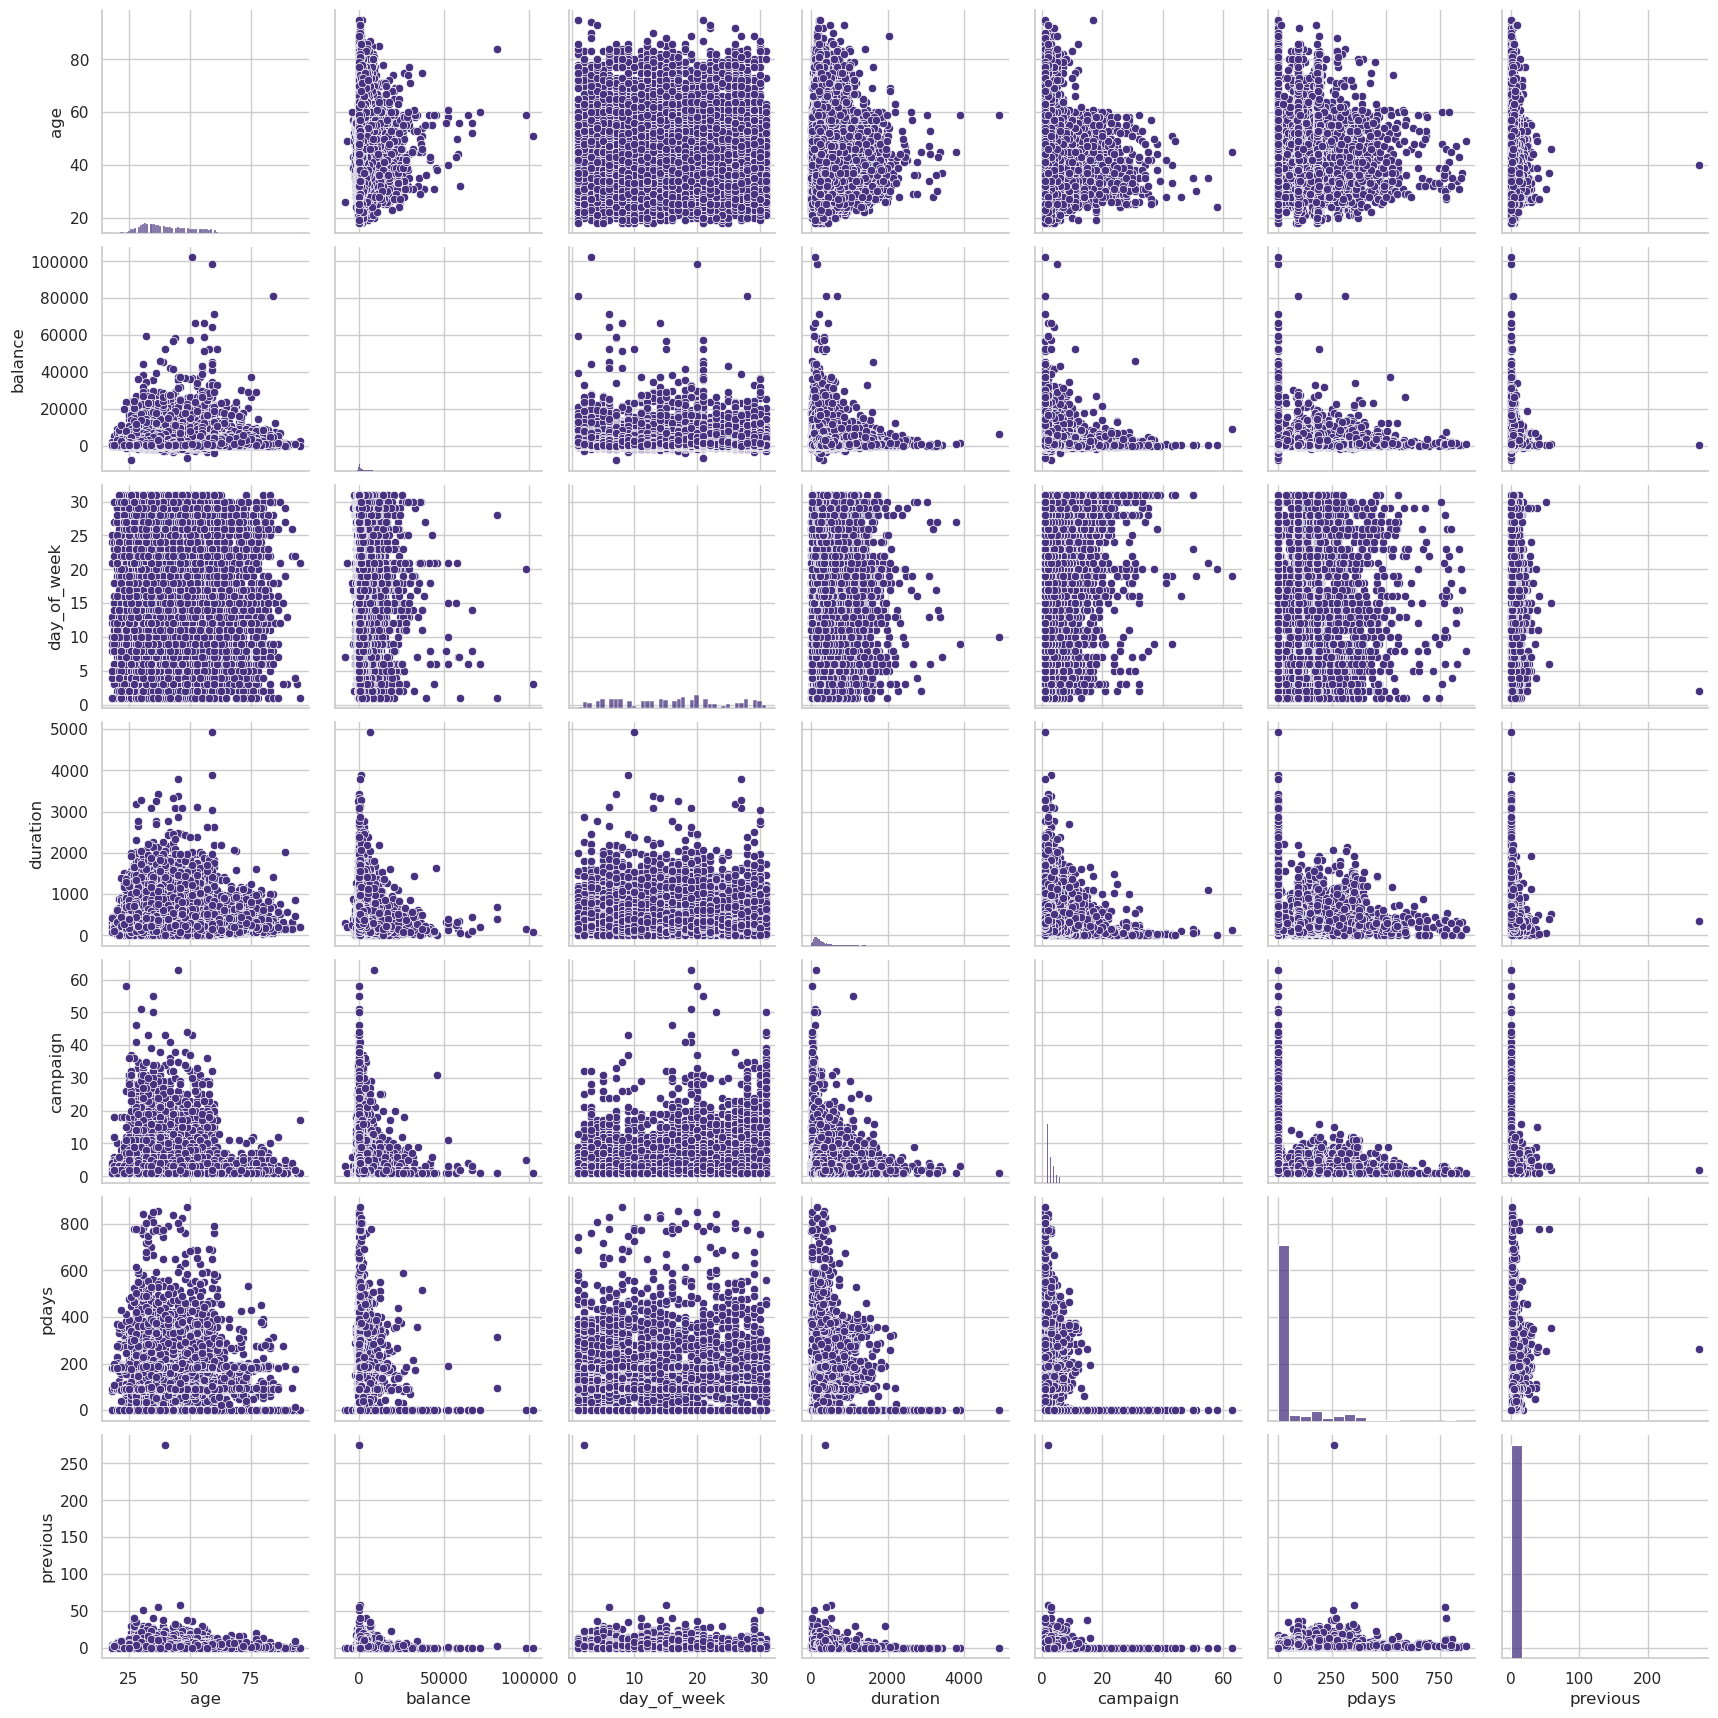

In [42]:
# Analisando a correlação dos dados
sns.pairplot(X)

In [43]:
# Convertendo variáveis categóricas para numéricas usando codificação one-hot
df_encoded = pd.get_dummies(X, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'], drop_first=True)

# Matriz de correlação
df_encoded.corr()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
age,1.0000,0.0978,-0.0091,-0.0046,0.0048,-0.0238,0.0013,-0.0440,0.0218,0.0867,...,-0.0075,0.0029,0.0518,0.0195,-0.1274,0.0328,0.0601,0.0324,-0.0230,0.0355
balance,0.0978,1.0000,0.0045,0.0216,-0.0146,0.0034,0.0167,-0.0488,0.0096,0.0017,...,-0.0244,-0.0644,0.0296,0.0232,-0.0711,0.1173,0.0402,0.0219,0.0085,0.0352
day_of_week,-0.0091,0.0045,1.0000,-0.0302,0.1625,-0.0930,-0.0517,-0.0229,-0.0023,0.0040,...,0.2505,0.1472,-0.1938,-0.0207,-0.0251,0.0961,0.0305,-0.0539,-0.0330,-0.0303
duration,-0.0046,0.0216,-0.0302,1.0000,-0.0846,-0.0016,0.0012,0.0096,-0.0013,-0.0080,...,0.0070,0.0162,-0.0214,-0.0055,0.0071,-0.0060,0.0151,0.0151,-0.0020,0.0424
campaign,0.0048,-0.0146,0.1625,-0.0846,1.0000,-0.0886,-0.0329,0.0090,0.0021,0.0031,...,-0.0631,0.1041,0.0439,-0.0186,-0.0676,-0.0847,-0.0510,-0.0367,-0.0201,-0.0575
pdays,-0.0238,0.0034,-0.0930,-0.0016,-0.0886,1.0000,0.4548,0.0201,-0.0142,-0.0313,...,0.0495,-0.1363,-0.1135,0.0320,0.0790,0.0079,0.0568,0.0844,0.3898,0.2285
previous,0.0013,0.0167,-0.0517,0.0012,-0.0329,0.4548,1.0000,-0.0171,-0.0082,-0.0152,...,0.0470,-0.0829,-0.0608,0.0273,0.0013,0.0379,0.0539,0.0650,0.3066,0.2014
job_blue-collar,-0.0440,-0.0488,-0.0229,0.0096,0.0090,0.0201,-0.0171,1.0000,-0.0966,-0.0880,...,-0.0363,-0.0132,0.0217,-0.0414,0.1654,-0.0480,-0.0424,-0.0448,0.0013,-0.0531
job_entrepreneur,0.0218,0.0096,-0.0023,-0.0013,0.0021,-0.0142,-0.0082,-0.0966,1.0000,-0.0310,...,-0.0058,0.0259,0.0155,-0.0166,-0.0099,0.0510,-0.0120,-0.0078,-0.0135,-0.0191
job_housemaid,0.0867,0.0017,0.0040,-0.0080,0.0031,-0.0313,-0.0152,-0.0880,-0.0310,1.0000,...,-0.0051,0.0350,0.0527,-0.0001,-0.0667,-0.0133,0.0062,-0.0023,-0.0168,-0.0094


<Axes: >

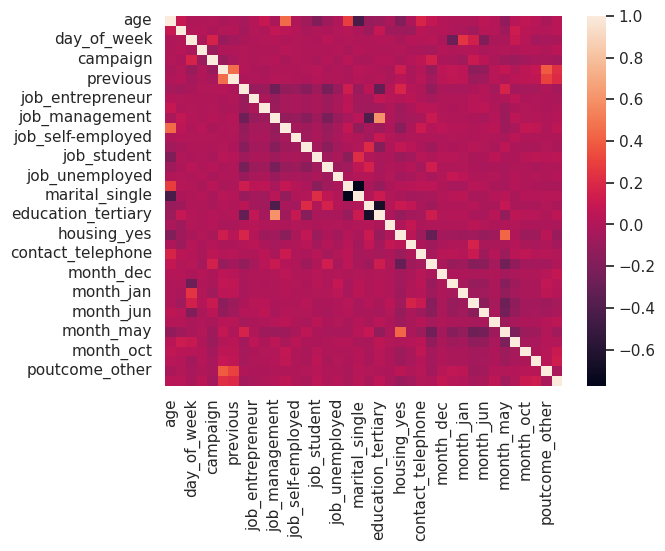

In [44]:
# Gráfico de calor para visualizar a correlação
sns.heatmap(df_encoded.corr())

# Análise Crítica das Descobertas

!!!!!!!!!!!!!!!!!!!!!!!!!!!!****************** COLOCAR MAIS COISAS AQUI ****************** ****************** !!!!!!!!!!!!!!!!!!!!!!!!!!!!

De acordo com a verificação da qualidade dos dados obtemos, a partir do gráfico de pares, da matriz de correlação e do mapa de calor, as seguintes observações: 

- Os dados são não lineares, assimétricos

- Consequentemente, a seleção de recursos não dependerá do fator de correlação.

- Além disso, nem um único recurso está completamente correlacionado com a classe, portanto, requer combinação de recursos.

# Propostas de Alterações para a Preparação dos Dados

!!!!!!!!!!!!!!!!!!!!!!!!!!!!****************** À FAZER ****************** ****************** !!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Conclusão

!!!!!!!!!!!!!!!!!!!!!!!!!!!!****************** À FAZER, QUANDO ACABAR TUDO ****************** ****************** !!!!!!!!!!!!!!!!!!!!!!!!!!!!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9cbf65cb-016b-458a-bee9-1cc8843984e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>